# End-to-End Data Analytics Project
**Tasks covered:** Web Scraping → EDA → Data Visualization → Sentiment Analysis


## Task 1 — Web Scraping (BeautifulSoup)

This notebook demonstrates scraping-like behavior **without internet** by parsing locally stored HTML
that mirrors the structure of `quotes.toscrape.com`. In a normal environment, replace the simulated HTML
with real HTTP requests (or use Scrapy/Octoparse/ParseHub).

In [1]:
# Imports
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
import os

# Matplotlib inline for Jupyter
%matplotlib inline

In [2]:
# --- Simulated HTML pages (offline-friendly) ---
html_pages = ['\n<html>\n  <body>\n    <div class="quote">\n      <span class="text">“The only limit to our realization of tomorrow is our doubts of today.”</span>\n      <span>by <small class="author">Franklin D. Roosevelt</small></span>\n      <div class="tags">\n        <a class="tag">inspirational</a>\n        <a class="tag">future</a>\n      </div>\n    </div>\n    <div class="quote">\n      <span class="text">“In the middle of difficulty lies opportunity.”</span>\n      <span>by <small class="author">Albert Einstein</small></span>\n      <div class="tags">\n        <a class="tag">motivation</a>\n        <a class="tag">life</a>\n      </div>\n    </div>\n    <div class="quote">\n      <span class="text">“Life is what happens when you\'re busy making other plans.”</span>\n      <span>by <small class="author">John Lennon</small></span>\n      <div class="tags">\n        <a class="tag">life</a>\n      </div>\n    </div>\n  </body>\n</html>\n', '\n<html>\n  <body>\n    <div class="quote">\n      <span class="text">“Success is not final, failure is not fatal: it is the courage to continue that counts.”</span>\n      <span>by <small class="author">Winston Churchill</small></span>\n      <div class="tags">\n        <a class="tag">success</a>\n        <a class="tag">courage</a>\n      </div>\n    </div>\n    <div class="quote">\n      <span class="text">“Happiness depends upon ourselves.”</span>\n      <span>by <small class="author">Aristotle</small></span>\n      <div class="tags">\n        <a class="tag">happiness</a>\n        <a class="tag">philosophy</a>\n      </div>\n    </div>\n    <div class="quote">\n      <span class="text">“Turn your wounds into wisdom.”</span>\n      <span>by <small class="author">Oprah Winfrey</small></span>\n      <div class="tags">\n        <a class="tag">wisdom</a>\n      </div>\n    </div>\n  </body>\n</html>\n', '\n<html>\n  <body>\n    <div class="quote">\n      <span class="text">“The purpose of our lives is to be happy.”</span>\n      <span>by <small class="author">Dalai Lama</small></span>\n      <div class="tags">\n        <a class="tag">happiness</a>\n        <a class="tag">purpose</a>\n      </div>\n    </div>\n    <div class="quote">\n      <span class="text">“Get busy living or get busy dying.”</span>\n      <span>by <small class="author">Stephen King</small></span>\n      <div class="tags">\n        <a class="tag">life</a>\n        <a class="tag">action</a>\n      </div>\n    </div>\n    <div class="quote">\n      <span class="text">“You have within you right now, everything you need to deal with whatever the world can throw at you.”</span>\n      <span>by <small class="author">Brian Tracy</small></span>\n      <div class="tags">\n        <a class="tag">self-help</a>\n      </div>\n    </div>\n  </body>\n</html>\n']

# --- Scrape using BeautifulSoup ---
records = []
for idx, html in enumerate(html_pages, start=1):
    soup = BeautifulSoup(html, "html.parser")
    for q in soup.select(".quote"):
        text = q.select_one(".text").get_text(strip=True).strip("“”")
        author = q.select_one(".author").get_text(strip=True)
        tags = [t.get_text(strip=True) for t in q.select(".tag")]
        records.append({"page": idx, "text": text, "author": author, "tags": ", ".join(tags)})

df = pd.DataFrame(records)
df["id"] = range(1, len(df)+1)
df = df[["id", "page", "author", "tags", "text"]]
df.head()

,id,page,author,tags,text
0,1,1,Franklin D. Roosevelt,"inspirational, future",The only limit to our realization of tomorrow ...
1,2,1,Albert Einstein,"motivation, life",In the middle of difficulty lies opportunity.
2,3,1,John Lennon,life,Life is what happens when you're busy making o...
3,4,2,Winston Churchill,"success, courage","Success is not final, failure is not fatal: it..."
4,5,2,Aristotle,"happiness, philosophy",Happiness depends upon ourselves.


### If you have internet access
Replace the simulated HTML with live requests (example):

```python
import requests
from bs4 import BeautifulSoup

records = []
for page in range(1, 6):
    url = f"https://quotes.toscrape.com/page/{page}/"
    res = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(res.text, "html.parser")
    for q in soup.select(".quote"):
        text = q.select_one(".text").get_text(strip=True).strip("“”")
        author = q.select_one(".author").get_text(strip=True)
        tags = [t.get_text(strip=True) for t in q.select(".tag")]
        records.append({"page": page, "text": text, "author": author, "tags": ", ".join(tags)})
df = pd.DataFrame(records)
```
Or use **Scrapy**, **Octoparse**, or **ParseHub** for point-and-click extraction.

## Task 2 — Exploratory Data Analysis (EDA)

In [3]:
# Dataset shape & basic info
print("Rows:", len(df))
print("Unique authors:", df['author'].nunique())
print("\nAuthors frequency:")
print(df['author'].value_counts())

# Add quote length
df["text_len"] = df["text"].apply(len)
print("\nQuote length stats:")
print(df["text_len"].describe())

df.head()

Rows: 9
Unique authors: 9

Authors frequency:
author
Franklin D. Roosevelt    1
Albert Einstein          1
John Lennon              1
Winston Churchill        1
Aristotle                1
Oprah Winfrey            1
Dalai Lama               1
Stephen King             1
Brian Tracy              1
Name: count, dtype: int64

Quote length stats:
count      9.000000
mean      54.777778
std       25.277350
min       29.000000
25%       34.000000
50%       45.000000
75%       69.000000
max      100.000000
Name: text_len, dtype: float64


,id,page,author,tags,text,text_len
0,1,1,Franklin D. Roosevelt,"inspirational, future",The only limit to our realization of tomorrow ...,69
1,2,1,Albert Einstein,"motivation, life",In the middle of difficulty lies opportunity.,45
2,3,1,John Lennon,life,Life is what happens when you're busy making o...,57
3,4,2,Winston Churchill,"success, courage","Success is not final, failure is not fatal: it...",86
4,5,2,Aristotle,"happiness, philosophy",Happiness depends upon ourselves.,33


In [4]:
# Clean text and compute top tokens
def normalize_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

stopwords = set("a an and are as at be but by for if in into is it of on or our so the to too with you your".split())

from collections import Counter
tokens = []
for t in df["text"].map(normalize_text):
    tokens.extend([w for w in t.split() if w not in stopwords and len(w) > 2])

word_counts = Counter(tokens)
top_20_words = word_counts.most_common(20)
top_20_words

[('busy', 3),
 ('not', 2),
 ('get', 2),
 ('only', 1),
 ('limit', 1),
 ('realization', 1),
 ('tomorrow', 1),
 ('doubts', 1),
 ('today', 1),
 ('middle', 1),
 ('difficulty', 1),
 ('lies', 1),
 ('opportunity', 1),
 ('life', 1),
 ('what', 1),
 ('happens', 1),
 ('when', 1),
 ('making', 1),
 ('other', 1),
 ('plans', 1)]

## Task 3 — Data Visualization

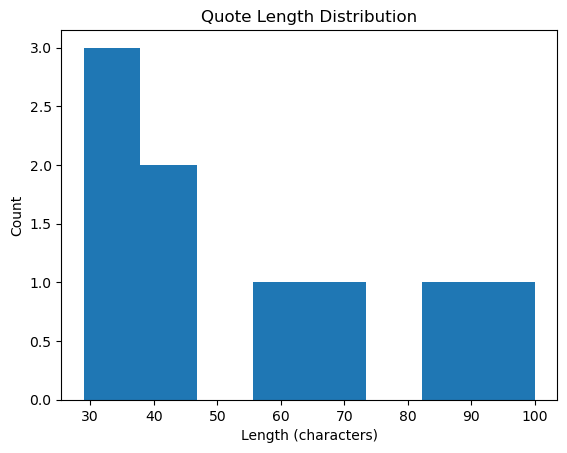

In [5]:
# 1) Histogram of quote lengths
plt.figure()
plt.hist(df["text_len"], bins=8)
plt.title("Quote Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Count")
plt.show()

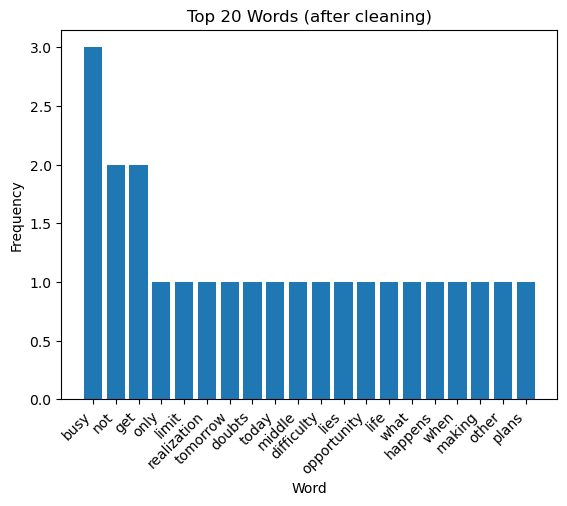

In [6]:
# 2) Bar chart of top 20 words
labels, values = zip(*top_20_words) if top_20_words else ([], [])
plt.figure()
plt.bar(range(len(values)), values)
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.title("Top 20 Words (after cleaning)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

## Task 4 — Sentiment Analysis (Rule-based, Lexicon)

In [7]:
positive_words = set("happy happiness success opportunity courage wisdom purpose depends continue need deal".split())
negative_words = set("failure doubts dying wounds".split())

def sentiment_score(s: str) -> int:
    words = set(normalize_text(s).split())
    pos = len(words & positive_words)
    neg = len(words & negative_words)
    return pos - neg

def sentiment_label(score: int) -> str:
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    return "Neutral"

df["sentiment_score"] = df["text"].apply(sentiment_score)
df["sentiment"] = df["sentiment_score"].apply(sentiment_label)

df[["id","author","text","sentiment","sentiment_score"]].head()

,id,author,text,sentiment,sentiment_score
0,1,Franklin D. Roosevelt,The only limit to our realization of tomorrow ...,Negative,-1
1,2,Albert Einstein,In the middle of difficulty lies opportunity.,Positive,1
2,3,John Lennon,Life is what happens when you're busy making o...,Neutral,0
3,4,Winston Churchill,"Success is not final, failure is not fatal: it...",Positive,2
4,5,Aristotle,Happiness depends upon ourselves.,Positive,2


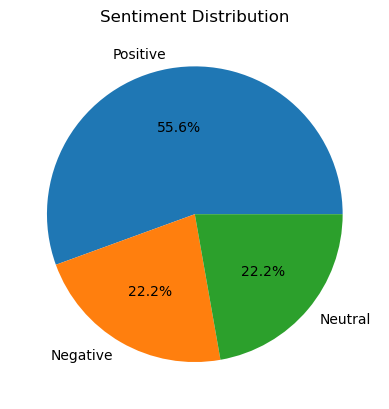

In [8]:
# Sentiment distribution (pie chart)
sent_counts = df["sentiment"].value_counts()
plt.figure()
plt.pie(sent_counts.values, labels=sent_counts.index, autopct="%1.1f%%")
plt.title("Sentiment Distribution")
plt.show()

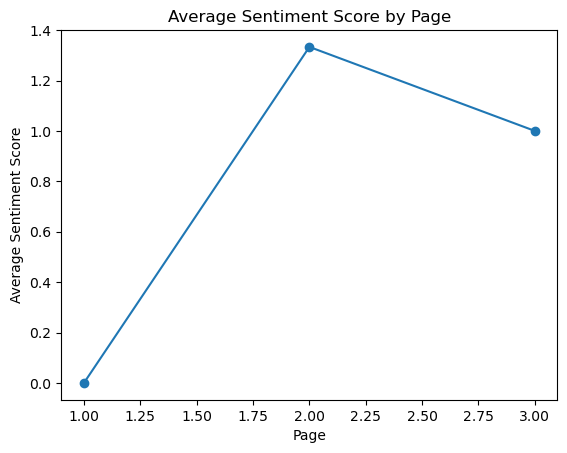

In [9]:
# Average sentiment by page (line chart)
page_sent = df.groupby("page")["sentiment_score"].mean()
plt.figure()
plt.plot(page_sent.index, page_sent.values, marker="o")
plt.title("Average Sentiment Score by Page")
plt.xlabel("Page")
plt.ylabel("Average Sentiment Score")
plt.show()